1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_columns',None)

import seaborn as sns
sns.set(style='ticks',color_codes=True,font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [10]:
# used find and replace for replacing ;  with , in csv file
data = pd.read_csv('cardio_train.csv')

In [11]:
data.shape

(69301, 13)

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.000,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.000,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.000,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.000,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.000,120,80,1,1,0,0,1,0


In [5]:
np.bincount(data['cardio']) # we see the class is not imbalanced

array([34679, 34622], dtype=int64)

In [6]:
data_Id = data['id']

In [7]:
data.drop('id',axis=1,inplace=True)

# Exploratory Data Analysis

In [8]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000,69301.000
mean,19468.786,1.350,164.362,74.203,128.830,96.650,1.367,1.226,0.088,0.054,0.804,0.500
std,2467.262,0.477,8.205,14.383,154.776,189.096,0.680,0.572,0.283,0.226,0.397,0.500
min,10798.000,1.000,55.000,10.000,-150.000,-70.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,17664.000,1.000,159.000,65.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
50%,19704.000,1.000,165.000,72.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
75%,21326.000,2.000,170.000,82.000,140.000,90.000,2.000,1.000,0.000,0.000,1.000,1.000
max,23713.000,2.000,250.000,200.000,16020.000,11000.000,3.000,3.000,1.000,1.000,1.000,1.000


In [9]:
def analysis(df,target):
    instance = df.shape[0]
    types=df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques=df.T.apply(pd.Series.unique,1)
    nulls= df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(pd.Series.nunique)
    null_perc = (df.isnull().sum()/instance)*100
    skewness = df.skew()
    kurtosis = df.kurt()
    
    corr = df.corr()[target]
    str = pd.concat([types, counts,uniques, nulls,distincts, null_perc, skewness, kurtosis, corr], axis = 1, sort=False)
    corr_col = 'corr '  + target
    cols = ['types', 'counts','uniques', 'nulls','distincts', 'missing_ratio', 'skewness', 'kurtosis', corr_col ]
    str.columns = cols
    return str

In [10]:
details = analysis(data,'cardio')
details

,types,counts,uniques,nulls,distincts,missing_ratio,skewness,kurtosis,corr cardio
age,int64,69301,"[22469.0, 14648.0, 21901.0, 14549.0, 23393.0, ...",0,8069,0.000,-0.307,-0.823,0.238
gender,int64,69301,"[1.0, 2.0]",0,2,0.000,0.631,-1.602,0.009
height,int64,69301,"[155.0, 163.0, 165.0, 164.0, 162.0, 161.0, 157...",0,108,0.000,-0.634,7.861,-0.011
weight,float64,69301,"[69.0, 71.0, 70.0, 85.0, 62.0, 61.0, 72.0, 93....",0,285,0.000,1.005,2.515,0.182
ap_hi,int64,69301,"[130.0, 110.0, 120.0, 100.0, 140.0, 160.0, 170...",0,153,0.000,84.886,7506.347,0.054
ap_lo,int64,69301,"[80.0, 70.0, 90.0, 100.0, 1000.0, 60.0, 79.0, ...",0,157,0.000,32.102,1421.287,0.065
cholesterol,int64,69301,"[2.0, 1.0, 3.0]",0,3,0.000,1.587,0.995,0.221
gluc,int64,69301,"[2.0, 1.0, 3.0]",0,3,0.000,2.398,4.295,0.089
smoke,int64,69301,"[0.0, 1.0]",0,2,0.000,2.908,6.454,-0.015
alco,int64,69301,"[0.0, 1.0]",0,2,0.000,3.952,13.617,-0.007


In [11]:
data['age']= abs(data['age']/365)

In [12]:
data['age']=data['age'].apply(np.floor).astype(int)

In [13]:
# reduce memory usage

In [6]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df.head()

In [7]:
reduce_mem_usage(data)

Memory usage of dataframe is 6.87 MB
Memory usage after optimization is: 1.39 MB
Decreased by 79.8%


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.000,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.000,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.000,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.000,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.000,120,80,1,1,0,0,1,0


In [16]:
details = analysis(data,'cardio')
details

,types,counts,uniques,nulls,distincts,missing_ratio,skewness,kurtosis,corr cardio
age,int8,69301,"[61.0, 40.0, 60.0, 39.0, 64.0, 57.0, 49.0, 58....",0,28,0.000,-0.306,-0.819,0.238
gender,int8,69301,"[1.0, 2.0]",0,2,0.000,0.631,-1.602,0.009
height,int16,69301,"[155.0, 163.0, 165.0, 164.0, 162.0, 161.0, 157...",0,108,0.000,-0.634,7.861,-0.011
weight,float16,69301,"[69.0, 71.0, 70.0, 85.0, 62.0, 61.0, 72.0, 93....",0,284,0.000,1.005,2.515,0.182
ap_hi,int16,69301,"[130.0, 110.0, 120.0, 100.0, 140.0, 160.0, 170...",0,153,0.000,84.886,7506.347,0.054
ap_lo,int16,69301,"[80.0, 70.0, 90.0, 100.0, 1000.0, 60.0, 79.0, ...",0,157,0.000,32.102,1421.287,0.065
cholesterol,int8,69301,"[2.0, 1.0, 3.0]",0,3,0.000,1.587,0.995,0.221
gluc,int8,69301,"[2.0, 1.0, 3.0]",0,3,0.000,2.398,4.295,0.089
smoke,int8,69301,"[0.0, 1.0]",0,2,0.000,2.908,6.454,-0.015
alco,int8,69301,"[0.0, 1.0]",0,2,0.000,3.952,13.617,-0.007


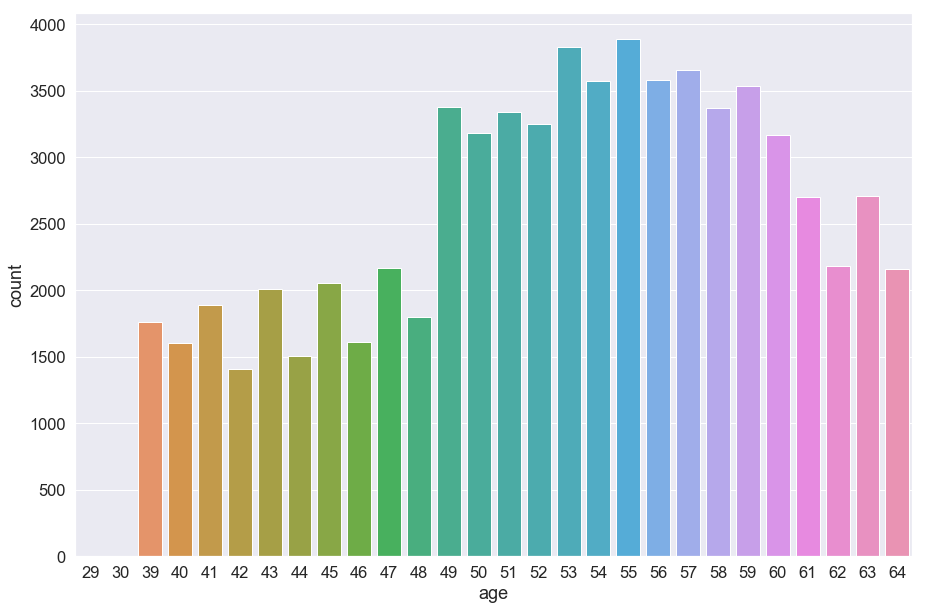

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(data['age'])
plt.show()

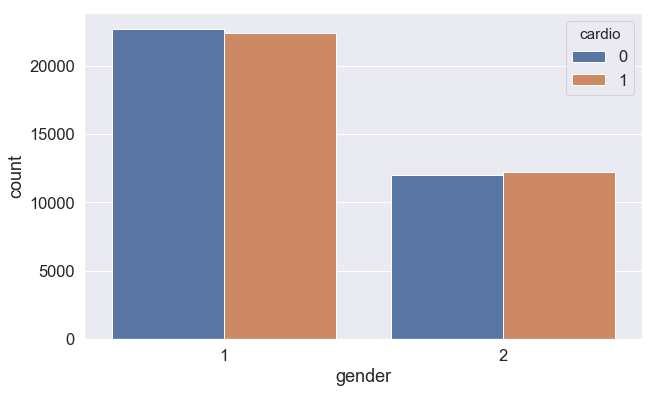

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data['gender'],hue=data['cardio'])
plt.show()

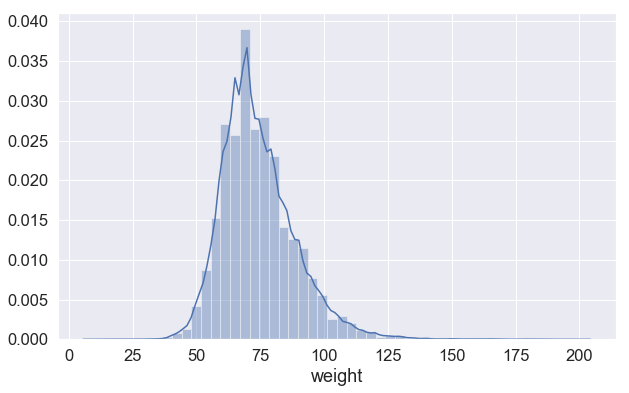

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(data['weight'],kde=True)
plt.show()

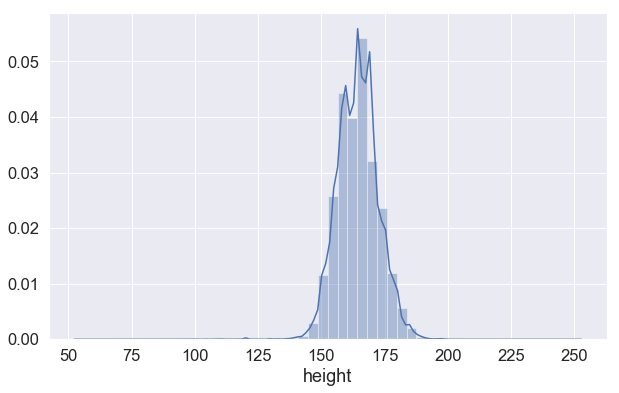

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(data['height'],kde=True)
plt.show()

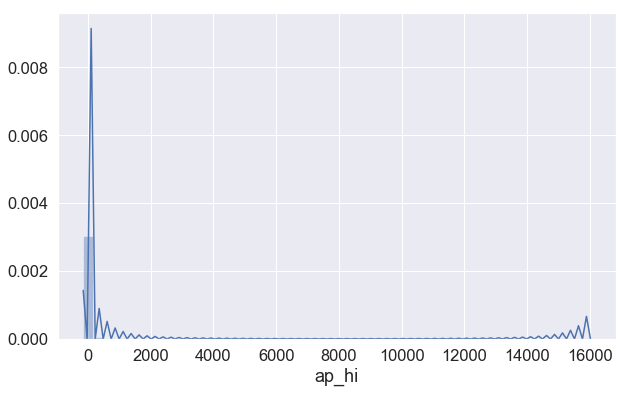

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(data['ap_hi'],kde=True)
plt.show()

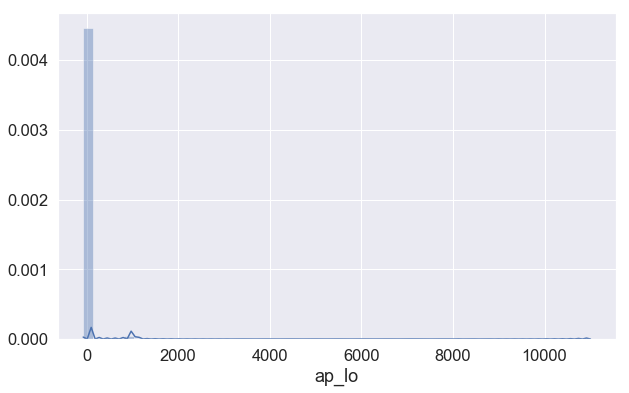

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(data['ap_lo'],kde=True)
plt.show()

Blood pressure usually ranges between 90 to 250 for the top or maximum number (systolic) and 60 to 140 for the bottom or minimum number (diastolic). Read more about it : http://www.bloodpressureuk.org/microsites/kyn/Home/AboutKYN/BPbasics/Thenumbers#:~:text=Blood%20pressure%20usually%20ranges%20between,can%20get%20it%2C%20the%20better.

In [23]:
temp = data.copy()
temp = temp[(temp['ap_hi']<250) & (temp['ap_hi']>90)]

In [24]:
temp = temp[(temp['ap_lo']<140) & (temp['ap_lo']>60) ]

In [25]:
temp.shape

(64996, 12)

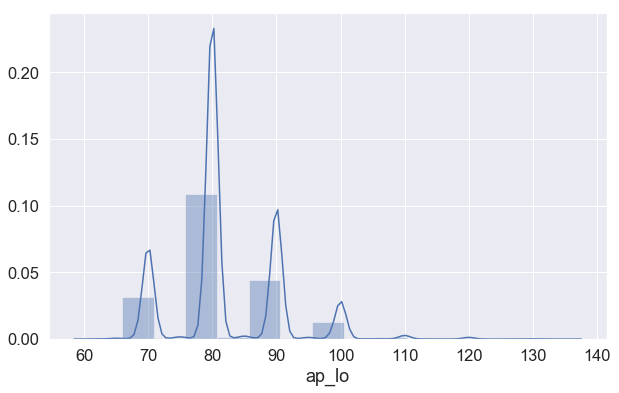

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(temp['ap_lo'],bins=15,kde=True,norm_hist=True)
plt.show()

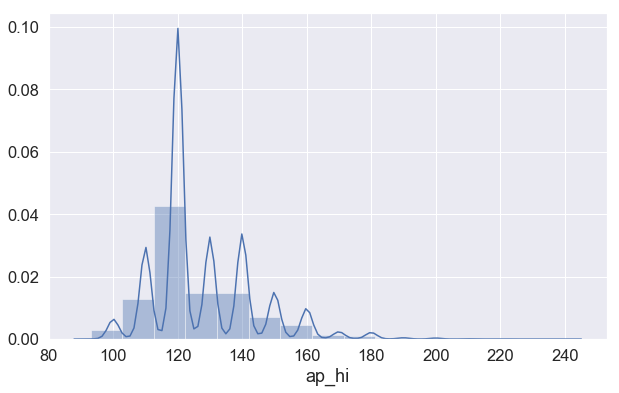

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(temp['ap_hi'],bins=15,kde=True,norm_hist=True)
plt.show()

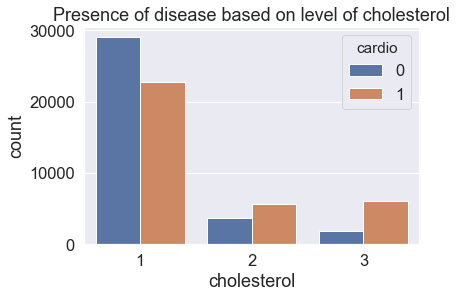

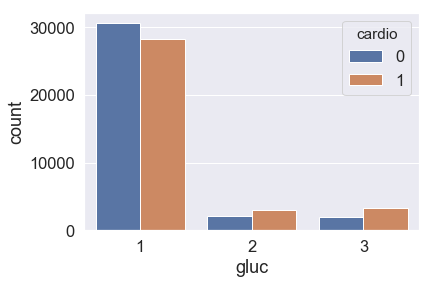

In [12]:
temp = data.copy()
sns.countplot(x='cholesterol',hue='cardio',data=temp)
plt.title('Presence of disease based on level of cholesterol')
plt.show()
sns.countplot(x='gluc',hue='cardio',data=temp)
plt.show()

<Figure size 432x288 with 0 Axes>

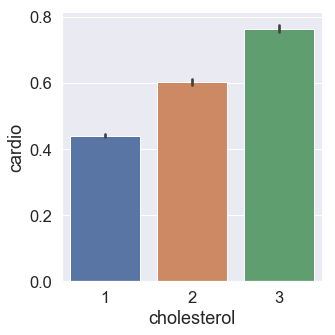

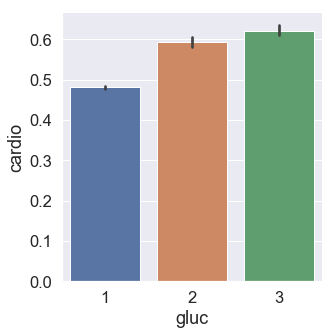

In [35]:
fig = plt.figure()
sns.catplot(x='cholesterol',y='cardio',hue_order = 'cardio',kind='bar',data=temp)
plt.show()
sns.catplot(x='gluc',y='cardio',hue_order='cardio',kind='bar',data=temp,legend=True)
plt.show()

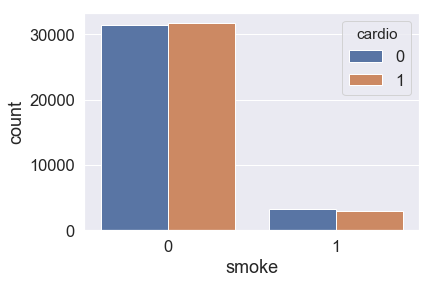

In [38]:
sns.countplot(x='smoke',hue='cardio',data=temp)
plt.show()

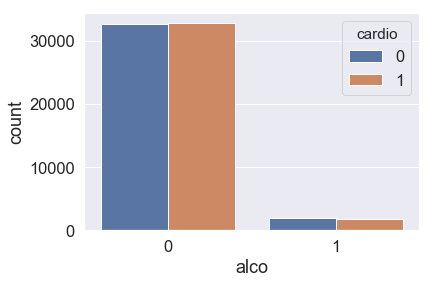

In [40]:
sns.countplot(x='alco',hue='cardio',data=temp)
plt.show()

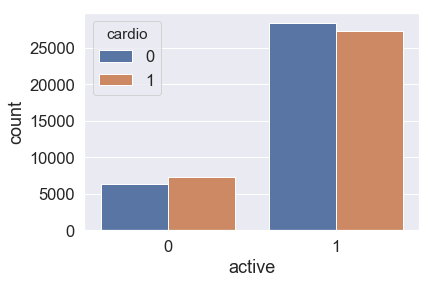

In [41]:
sns.countplot(x='active',hue='cardio',data=temp)
plt.show()

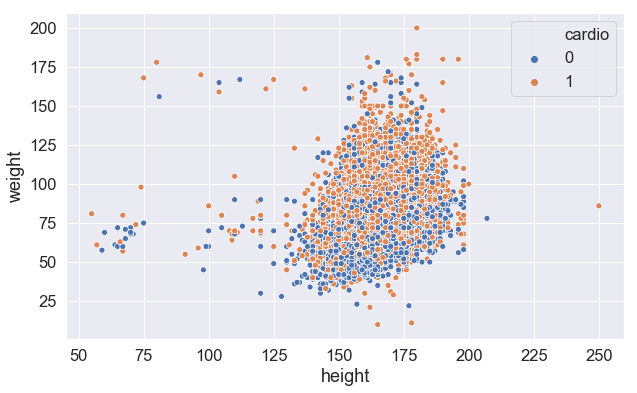

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='height',y='weight',data=temp,hue='cardio')
plt.show()

# Outlier Removal

In [49]:
data = data[(data['ap_hi']<250) & (data['ap_hi']>90)]

In [50]:
data = data[(data['ap_lo']<140) & (data['ap_lo']>60)]

In [1]:
data.to_csv('cleaned_data.csv')

NameError: name 'data' is not defined

In [ ]:
sns.heatmap?